In [6]:
## Importation des Bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tatiana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Charger le dataset SMS Spam Collection
# Charger seulement les colonnes nécessaires ('v1' et 'v2')
data = pd.read_csv('../data/spam.csv', usecols=['v1', 'v2'], encoding='latin1')
data.columns = ['label', 'text']  # Renommer les colonnes pour plus de clarté
print("Aperçu des données :")
print(data.head())

Aperçu des données :
  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [10]:
## Étape 3 : Prétraitement des Données

# Convertir les labels en numériques : 1 pour spam, 0 pour ham
data['label'] = data['label'].map({'spam': 1, 'ham': 0})

# Fonction de nettoyage des messages
def clean_text(text):
    text = text.lower()  # Convertir en minuscules
    text = ''.join([char for char in text if char not in string.punctuation])  # Retirer la ponctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Retirer les stopwords
    return text

# Application du nettoyage
data['text'] = data['text'].apply(clean_text)

print("\nAperçu des données après nettoyage :")
print(data.head())


Aperçu des données après nettoyage :
   label                                               text
0      0  go jurong point crazy available bugis n great ...
1      0                            ok lar joking wif u oni
2      1  free entry 2 wkly comp win fa cup final tkts 2...
3      0                u dun say early hor u c already say
4      0        nah dont think goes usf lives around though


In [11]:
## Étape 4 : Extraction des Caractéristiques

# Utiliser TF-IDF pour convertir les textes en vecteurs numériques
tfidf = TfidfVectorizer(max_features=3000)  # Limiter à 3000 caractéristiques pour réduire la dimensionnalité
X = tfidf.fit_transform(data['text']).toarray()  # Conversion en array
y = data['label']

In [12]:
## Étape 5 : Division des Données

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
## Étape 6 : Entraînement du Modèle

# Entraîner un modèle Naive Bayes pour la classification
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [14]:
## Étape 7 : Évaluation du Modèle

# Prédire sur les données de test
y_pred = model.predict(X_test)

In [15]:
# Afficher le rapport de classification
print("\nRapport de Classification :")
print(classification_report(y_test, y_pred))


Rapport de Classification :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



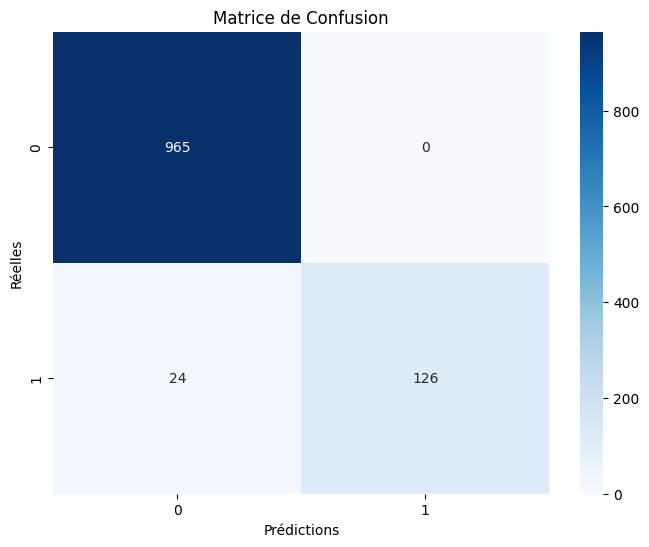

In [16]:
# Afficher la matrice de confusion
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.show()